In [413]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, norm, skew
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Aquisição dos dados

In [437]:
test_set = pd.read_csv(r'./eel891-202101-trabalho-2/conjunto_de_teste.csv')
test_set

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,churrasqueira,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar
0,0,Apartamento,Pina,Imobiliaria,4,4,3,182,0,copa e playground,0,0,0,1,0,0,0,0,0,0
1,1,Apartamento,Tamarineira,Imobiliaria,2,0,1,85,0,nenhum,0,0,0,0,0,0,0,0,0,0
2,2,Apartamento,Boa Viagem,Imobiliaria,3,1,2,115,20,piscina e churrasqueira,1,0,1,0,0,0,0,0,0,0
3,3,Apartamento,Iputinga,Imobiliaria,3,0,1,92,0,nenhum,0,0,0,0,0,0,0,0,0,0
4,4,Apartamento,Engenho do Meio,Imobiliaria,3,1,1,65,0,piscina e copa,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,Apartamento,Poco da Panela,Imobiliaria,2,1,2,100,0,nenhum,0,0,0,0,0,0,0,0,0,0
1996,1996,Apartamento,Madalena,Imobiliaria,3,1,1,90,0,nenhum,0,0,0,0,0,0,0,0,0,0
1997,1997,Apartamento,Boa Viagem,Imobiliaria,3,1,1,73,0,piscina e salao de festas,0,0,1,0,0,1,0,0,0,0
1998,1998,Apartamento,Torre,Imobiliaria,4,3,2,112,2810,piscina e frente para o mar,0,0,1,0,0,0,0,0,0,1


In [438]:
train_set = pd.read_csv(r'./eel891-202101-trabalho-2/conjunto_de_treinamento.csv')
train_set

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,...,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,preco
0,2000,Casa,Imbiribeira,Imobiliaria,3,3,5,223,167,piscina e copa,...,0,1,0,0,0,0,0,0,0,1000000.0
1,2001,Apartamento,Casa Amarela,Imobiliaria,4,4,2,157,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,680000.0
2,2002,Apartamento,Encruzilhada,Imobiliaria,3,1,0,53,0,nenhum,...,0,0,0,0,0,0,0,0,0,450000.0
3,2003,Apartamento,Boa Viagem,Imobiliaria,4,3,2,149,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,1080000.0
4,2004,Apartamento,Rosarinho,Imobiliaria,2,1,1,54,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,6678,Apartamento,Boa Viagem,Imobiliaria,4,4,3,170,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,1200000.0
4679,6679,Apartamento,Setubal,Imobiliaria,2,0,1,82,0,churrasqueira,...,0,0,0,0,0,0,0,0,0,258000.0
4680,6680,Apartamento,Torre,Imobiliaria,3,1,1,75,0,nenhum,...,0,0,0,0,0,0,0,0,0,252000.0
4681,6681,Apartamento,Casa Amarela,Imobiliaria,3,2,3,136,0,piscina e copa,...,0,1,0,0,0,0,0,0,0,780000.0


In [454]:
training = True

if training:
    df = train_set
else:
    df = test_set

# Análise Estatística dos Dados 

C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


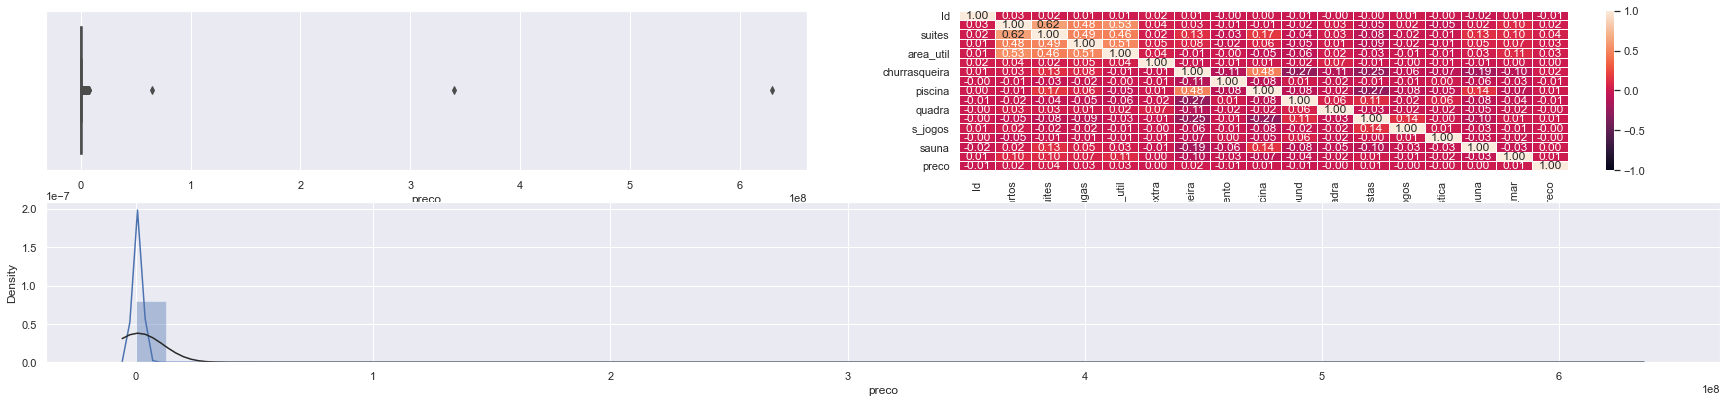

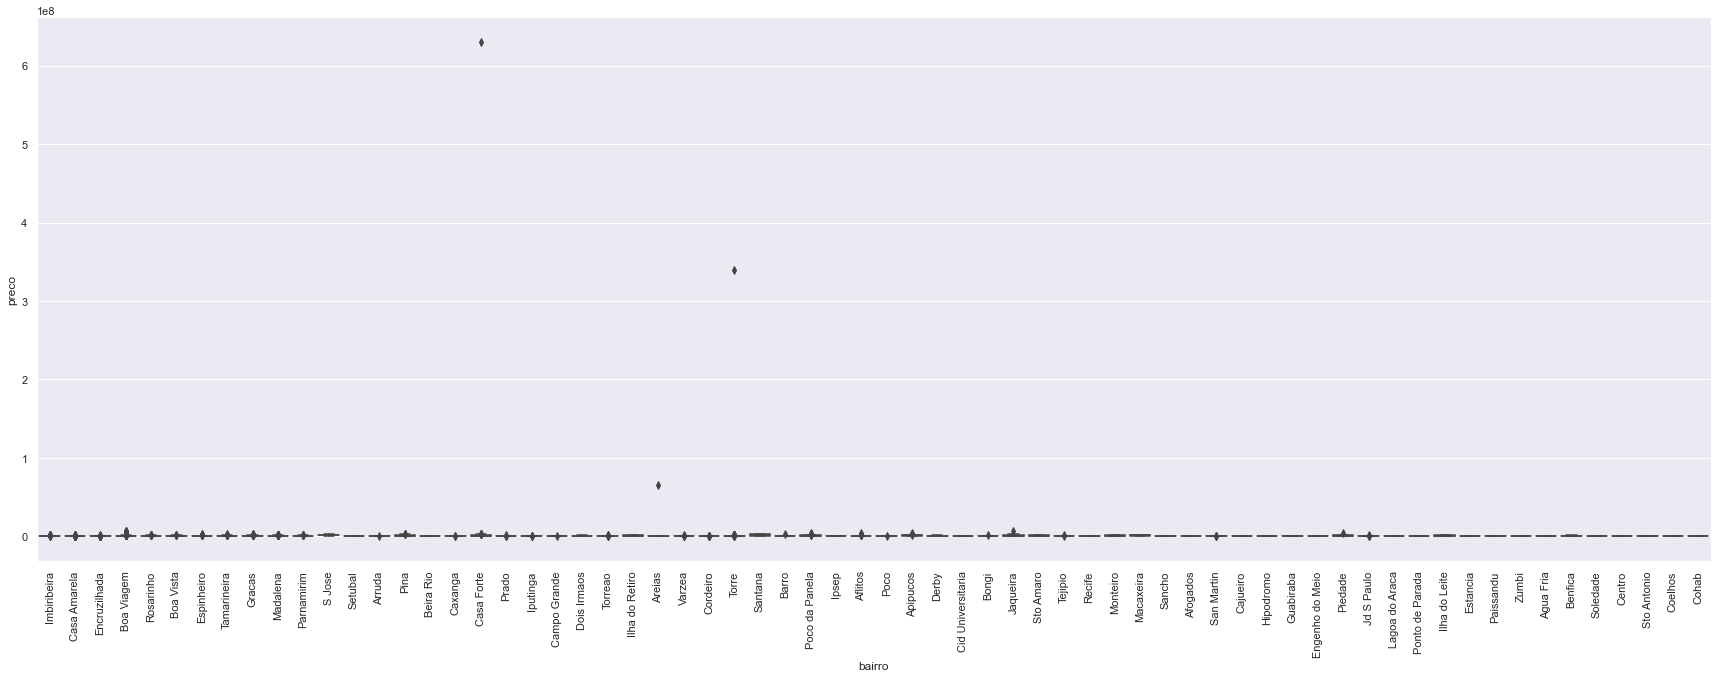

In [455]:
if training:
    from matplotlib.gridspec import GridSpec
    fig = plt.figure(figsize=(30,10))
    gs=GridSpec(3,2)
    sns.boxplot(train_set["preco"], ax=fig.add_subplot(gs[0,0]))
    sns.heatmap(df[[i for i in df.columns if df[i].dtype != 'object']].corr(), vmin=-1, vmax= 1, annot=True, fmt=".2f", linewidths=.5, ax=fig.add_subplot(gs[0,1]))
    sns.distplot(df["preco"], fit=norm, ax=fig.add_subplot(gs[1,:]))

    fig1 = plt.figure(figsize=(30,10))
    sns.boxplot(data=df, x="bairro", y="preco")
    plt.xticks(rotation=90)
    plt.show()


## Notamos a presença de outliers no nossos dados que prejudicam as visualizações e a análise. dessa forma, aplicaremos um tratamento para o nosso conjunto.

## Para remover outliers no conjunto de dados de preço vamos realizar a abordagem do Intervalo Interquartil, portanto iremos trabalhar com uma amostra de preços que estejam contidas no intervalo [Q1-1.5*IQ,Q3+1.5*IQ]

In [456]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [457]:
if training:
    df = remove_outlier(df, "preco")
df

,Id,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,diferenciais,...,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,preco
0,2000,Casa,Imbiribeira,Imobiliaria,3,3,5,223,167,piscina e copa,...,0,1,0,0,0,0,0,0,0,1000000.0
1,2001,Apartamento,Casa Amarela,Imobiliaria,4,4,2,157,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,680000.0
2,2002,Apartamento,Encruzilhada,Imobiliaria,3,1,0,53,0,nenhum,...,0,0,0,0,0,0,0,0,0,450000.0
3,2003,Apartamento,Boa Viagem,Imobiliaria,4,3,2,149,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,1080000.0
4,2004,Apartamento,Rosarinho,Imobiliaria,2,1,1,54,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,6678,Apartamento,Boa Viagem,Imobiliaria,4,4,3,170,0,piscina e churrasqueira,...,0,1,0,0,0,0,0,0,0,1200000.0
4679,6679,Apartamento,Setubal,Imobiliaria,2,0,1,82,0,churrasqueira,...,0,0,0,0,0,0,0,0,0,258000.0
4680,6680,Apartamento,Torre,Imobiliaria,3,1,1,75,0,nenhum,...,0,0,0,0,0,0,0,0,0,252000.0
4681,6681,Apartamento,Casa Amarela,Imobiliaria,3,2,3,136,0,piscina e copa,...,0,1,0,0,0,0,0,0,0,780000.0


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


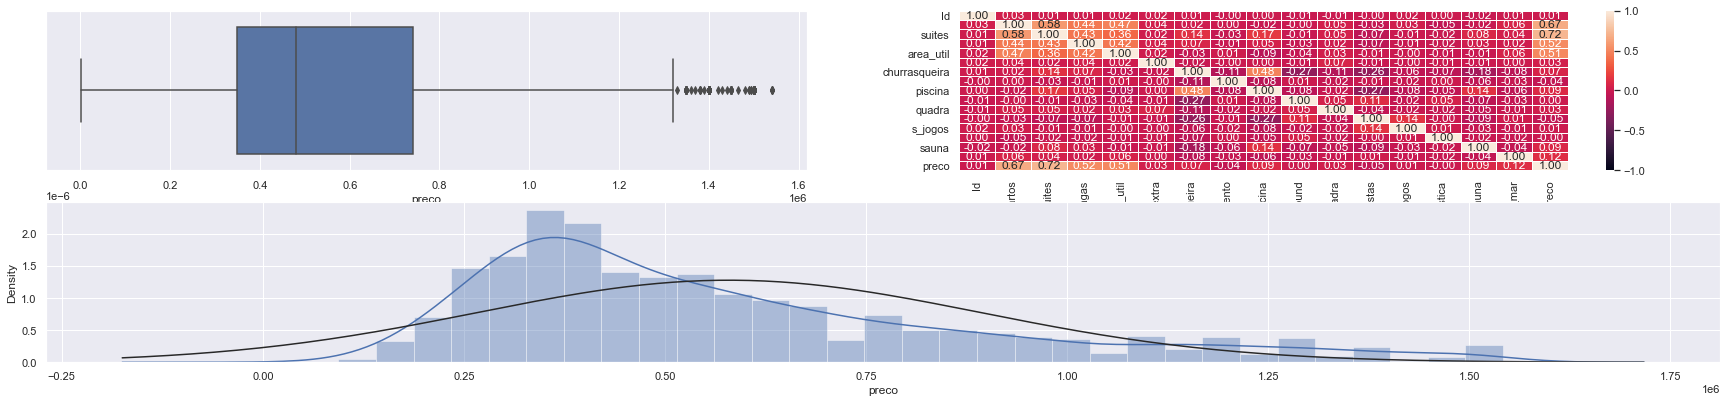

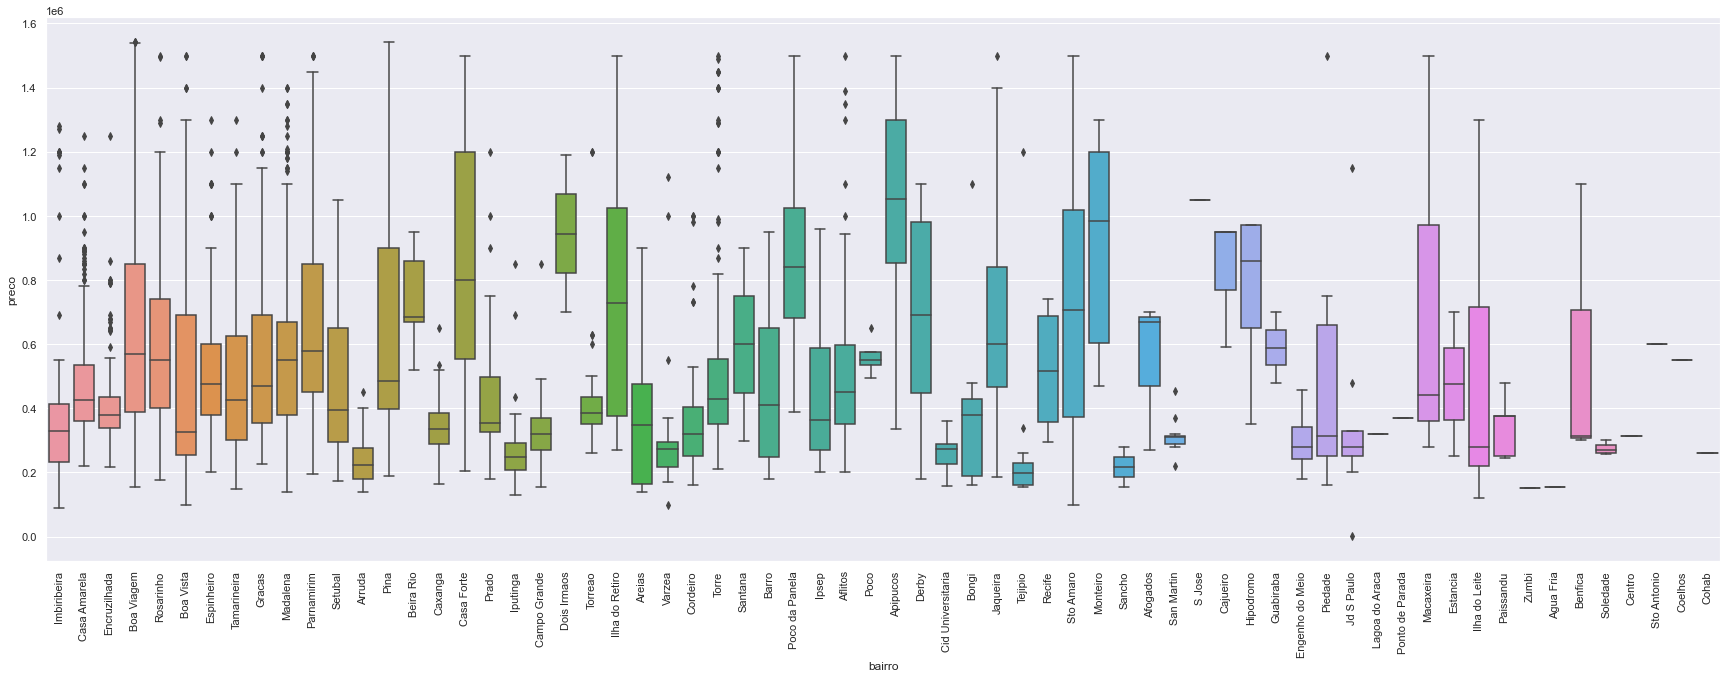

In [458]:
if training:
    from matplotlib.gridspec import GridSpec
    fig = plt.figure(figsize=(30,10))
    gs=GridSpec(3,2)
    sns.boxplot(df["preco"], ax=fig.add_subplot(gs[0,0]))
    sns.heatmap(df[[i for i in df.columns if df[i].dtype != 'object']].corr(), vmin=-1, vmax= 1, annot=True, fmt=".2f", linewidths=.5, ax=fig.add_subplot(gs[0,1]))
    sns.distplot(df["preco"], fit=norm, ax=fig.add_subplot(gs[1,:]))

    fig1 = plt.figure(figsize=(30,10))
    sns.boxplot(data=df, x="bairro", y="preco")
    plt.xticks(rotation=90)
    plt.show()

In [459]:
df.corr().round(2).loc["preco"]

Id                0.01
quartos           0.67
suites            0.72
vagas             0.52
area_util         0.51
area_extra        0.03
churrasqueira     0.07
estacionamento   -0.04
piscina           0.09
playground        0.00
quadra            0.03
s_festas         -0.05
s_jogos           0.01
s_ginastica      -0.00
sauna             0.09
vista_mar         0.12
preco             1.00
Name: preco, dtype: float64

## Podemos notar acima a melhora da estrutura do nosso conjunto e aumento do coeficiente de correlação entre o target e algumas varáveis explicativas.

# Analisando agora o tipo de dado de cada coluna e a presença ou não de valores nulos.

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4361 entries, 0 to 4682
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              4361 non-null   int64  
 1   tipo            4361 non-null   object 
 2   bairro          4361 non-null   object 
 3   tipo_vendedor   4361 non-null   object 
 4   quartos         4361 non-null   int64  
 5   suites          4361 non-null   int64  
 6   vagas           4361 non-null   int64  
 7   area_util       4361 non-null   int64  
 8   area_extra      4361 non-null   int64  
 9   diferenciais    4361 non-null   object 
 10  churrasqueira   4361 non-null   int64  
 11  estacionamento  4361 non-null   int64  
 12  piscina         4361 non-null   int64  
 13  playground      4361 non-null   int64  
 14  quadra          4361 non-null   int64  
 15  s_festas        4361 non-null   int64  
 16  s_jogos         4361 non-null   int64  
 17  s_ginastica     4361 non-null   i

### Vemos que não há presença de valores nulos no nosso dataframe. No entanto, notamos a presença de dados categóricos. 
### Analisando essas colunas vemos que são do tipo categórico nominal.

In [461]:
df[[i for i in df.columns if df[i].dtype == 'object']].T

,0,1,2,3,4,5,6,7,8,9,...,4672,4673,4675,4676,4677,4678,4679,4680,4681,4682
tipo,Casa,Apartamento,Apartamento,Apartamento,Apartamento,Apartamento,Apartamento,Apartamento,Apartamento,Apartamento,...,Apartamento,Apartamento,Apartamento,Apartamento,Apartamento,Apartamento,Apartamento,Apartamento,Apartamento,Apartamento
bairro,Imbiribeira,Casa Amarela,Encruzilhada,Boa Viagem,Rosarinho,Boa Vista,Rosarinho,Espinheiro,Boa Viagem,Boa Viagem,...,Boa Viagem,Boa Viagem,Boa Viagem,Boa Viagem,Torre,Boa Viagem,Setubal,Torre,Casa Amarela,Madalena
tipo_vendedor,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,...,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria,Imobiliaria
diferenciais,piscina e copa,piscina e churrasqueira,nenhum,piscina e churrasqueira,piscina e churrasqueira,playground,piscina e playground,nenhum,piscina e churrasqueira,nenhum,...,playground e salao de festas,frente para o mar e salao de festas,piscina e playground,piscina e churrasqueira,piscina e churrasqueira,piscina e churrasqueira,churrasqueira,nenhum,piscina e copa,piscina e playground


### Iremos descartar a coluna 'diferenciais' pois além dela prejudicar nossa análise, alguns de seus campos são redundantes.

In [462]:
df = df.drop(["diferenciais", "Id"], axis=1)
df

,tipo,bairro,tipo_vendedor,quartos,suites,vagas,area_util,area_extra,churrasqueira,estacionamento,piscina,playground,quadra,s_festas,s_jogos,s_ginastica,sauna,vista_mar,preco
0,Casa,Imbiribeira,Imobiliaria,3,3,5,223,167,0,0,1,0,0,0,0,0,0,0,1000000.0
1,Apartamento,Casa Amarela,Imobiliaria,4,4,2,157,0,1,0,1,0,0,0,0,0,0,0,680000.0
2,Apartamento,Encruzilhada,Imobiliaria,3,1,0,53,0,0,0,0,0,0,0,0,0,0,0,450000.0
3,Apartamento,Boa Viagem,Imobiliaria,4,3,2,149,0,1,0,1,0,0,0,0,0,0,0,1080000.0
4,Apartamento,Rosarinho,Imobiliaria,2,1,1,54,0,1,0,1,0,0,0,0,0,0,0,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,Apartamento,Boa Viagem,Imobiliaria,4,4,3,170,0,1,0,1,0,0,0,0,0,0,0,1200000.0
4679,Apartamento,Setubal,Imobiliaria,2,0,1,82,0,1,0,0,0,0,0,0,0,0,0,258000.0
4680,Apartamento,Torre,Imobiliaria,3,1,1,75,0,0,0,0,0,0,0,0,0,0,0,252000.0
4681,Apartamento,Casa Amarela,Imobiliaria,3,2,3,136,0,0,0,1,0,0,0,0,0,0,0,780000.0


In [463]:
df.tipo.value_counts()

Apartamento    4207
Casa            149
Loft              3
Quitinete         2
Name: tipo, dtype: int64

### Devido a baixa penetração do número de loft e quitinetes, iremos optar por removê-los.

In [464]:
if training:
    df = df.drop(df[df["tipo"].isin(["Loft","Quitinete"])].index, axis=0)
    df

In [465]:
df.tipo_vendedor.value_counts()

Imobiliaria      4237
Pessoa Fisica     119
Name: tipo_vendedor, dtype: int64

## Aplicaremos o conceito de One-Hot encoding para criar uma nova coluna para cada valor único de uma coluna existente. Além disso, sempre que aplicamos esse processo ficamos com uma coluna redundante, então descartamos uma passando o atributo 'drop_first=True'

In [466]:
from sklearn import preprocessing
cols = ["tipo", "bairro", "tipo_vendedor"]

if training:
    one_hot_encoder = preprocessing.OneHotEncoder(handle_unknown="ignore")
    one_hot_encoder.fit(df[cols])

one_hot_encoded_columns = one_hot_encoder.transform(df[cols]).toarray()
# one_hot_encoder.get_feature_names()

ohe_df = pd.DataFrame(one_hot_encoded_columns, columns=one_hot_encoder.get_feature_names())

df = pd.concat([df.reset_index(drop=True), ohe_df], axis=1).drop(cols, axis=1)
df

C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,quartos,suites,vagas,area_util,area_extra,churrasqueira,estacionamento,piscina,playground,quadra,...,x1_Sto Amaro,x1_Sto Antonio,x1_Tamarineira,x1_Tejipio,x1_Torre,x1_Torreao,x1_Varzea,x1_Zumbi,x2_Imobiliaria,x2_Pessoa Fisica
0,3,3,5,223,167,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,4,2,157,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,0,53,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4,3,2,149,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2,1,1,54,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351,4,4,3,170,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4352,2,0,1,82,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4353,3,1,1,75,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4354,3,2,3,136,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [452]:
import numpy as np
def rmspe(y, y_answer):
    value = np.sqrt(np.mean(np.square(((y - y_answer) / y)), axis=0))
    return value

In [432]:
if training:
    shuffled_df = df.sample(frac=1, random_state=12345)
    x = shuffled_df.iloc[:, shuffled_df.columns!='preco']
    y = shuffled_df.iloc[:, shuffled_df.columns=='preco']

    num_lines = shuffled_df.shape[0]
    training_size = round(0.8*num_lines)

    x_training = x.values[:training_size,:-1]
    y_training = y.values[:training_size,-1].ravel()

    x_test = x.values[training_size:,:-1]
    y_test = y.values[training_size:,-1].ravel()
else:
    x = df.iloc[:, df.columns!='preco']
    x_test = x.values[:, :-1]

# Gradient Boosting

In [387]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, HistGradientBoostingRegressor

In [412]:
results = []
for i in range(30, 37):
    for j in range(100, 110):
        for k in ['least_absolute_deviation']:
            for l in range(2, 14, 2):
                rgsGB = HistGradientBoostingRegressor(l2_regularization=i, max_iter=j, loss=k, max_depth=l)
                
                rgsGB = rgsGB.fit(x_training, y_training)

                y_train_answer = rgsGB.predict(x_training)
                y_test_answer = rgsGB.predict(x_test)

                rmspe_in = rmspe(y_training, y_train_answer)
                rmspe_out = rmspe(y_test, y_test_answer)
                results.append((l, k, j, i, rmspe_in, rmspe_out))
                # print(rmspe_out)

In [390]:
best_choose = sorted(results, key=lambda i: i[-1], reverse=True)
print (best_choose[-1])

(12, 'least_absolute_deviation', 109, 31, 5.240942464892085, 0.22823041446060285)


In [410]:
if training:
    rgsGB = HistGradientBoostingRegressor(l2_regularization=31, max_iter=109, loss='least_absolute_deviation', max_depth=12)

    rgsGB = rgsGB.fit(x_training, y_training)

    y_train_answer = rgsGB.predict(x_training)
    y_test_answer = rgsGB.predict(x_test)

    rmspe_in = rmspe(y_training, y_train_answer)
    rmspe_out = rmspe(y_test, y_test_answer)
    print(f'rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')
else:
    y_test_answer_kaggle = rgsGB.predict(x_test)

In [411]:
if not training:
    pd.DataFrame(
        {
            'Id': range(len(y_test_answer_kaggle)),
            'preco': y_test_answer_kaggle,
        }
    ).to_csv('teste_kaggle.csv', index=False)

# Random Forest

In [433]:
for i in range(100, 1500, 100):
  rgsRF = RandomForestRegressor(n_estimators=i,random_state=0,min_samples_leaf=2,n_jobs=10,criterion='mse',verbose=0)

  rgsRF = rgsRF.fit(x_training, y_training)

  y_train_answer = rgsRF.predict(x_training)
  y_test_answer = rgsRF.predict(x_test)

  rmspe_in = rmspe(y_training, y_train_answer)
  rmspe_out = rmspe(y_test, y_test_answer)
  print(f'n_estimators {i}, rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 100, rmspe_in 3.414104761898549, rmspe_out 0.23687522485543555


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 200, rmspe_in 3.384027008363903, rmspe_out 0.2375006497792759


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 300, rmspe_in 3.4761187756710767, rmspe_out 0.23752703306290301


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 400, rmspe_in 3.5434211490605536, rmspe_out 0.23754583624951917


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 500, rmspe_in 3.538807906491895, rmspe_out 0.2374930347936068


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 600, rmspe_in 3.5268888317960236, rmspe_out 0.23735643345366383


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 700, rmspe_in 3.517598339881825, rmspe_out 0.23731112877390634


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 800, rmspe_in 3.4994217795166502, rmspe_out 0.23755532805476468


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 900, rmspe_in 3.501658015968052, rmspe_out 0.2375447147724017


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 1000, rmspe_in 3.50738214220477, rmspe_out 0.23747731814173867


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 1100, rmspe_in 3.531995108727749, rmspe_out 0.237441211304535


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 1200, rmspe_in 3.516335270366925, rmspe_out 0.2374063215963794


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 1300, rmspe_in 3.51120246583003, rmspe_out 0.2374844276075214


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


n_estimators 1400, rmspe_in 3.5164288727799136, rmspe_out 0.23746172095328455


In [434]:
for i in range(2, 12, 2):
  rgsRF = RandomForestRegressor(n_estimators=100,random_state=0,min_samples_leaf=i,n_jobs=10,criterion='mse',verbose=0)

  rgsRF = rgsRF.fit(x_training, y_training)

  y_train_answer = rgsRF.predict(x_training)
  y_test_answer = rgsRF.predict(x_test)

  rmspe_in = rmspe(y_training, y_train_answer)
  rmspe_out = rmspe(y_test, y_test_answer)
  print(f'min_samples_leaf {i}, rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


min_samples_leaf 2, rmspe_in 3.414104761898549, rmspe_out 0.23687522485543555


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


min_samples_leaf 4, rmspe_in 4.290695370202309, rmspe_out 0.24212146774235146


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


min_samples_leaf 6, rmspe_in 4.477633263052903, rmspe_out 0.24921754686593103


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


min_samples_leaf 8, rmspe_in 4.594107250084666, rmspe_out 0.2518590633524312


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


min_samples_leaf 10, rmspe_in 4.641072991028407, rmspe_out 0.2549423446943517


In [435]:

for i in range(2, 6, 2):
  rgsRF = RandomForestRegressor(n_estimators=100,random_state=0,min_samples_leaf=i,n_jobs=10,criterion='mse',verbose=0)

  rgsRF = rgsRF.fit(x_training, y_training)

  y_train_answer = rgsRF.predict(x_training)
  y_test_answer = rgsRF.predict(x_test)

  rmspe_in = rmspe(y_training, y_train_answer)
  rmspe_out = rmspe(y_test, y_test_answer)
  print(f'min_samples_leaf {i}, rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


min_samples_leaf 2, rmspe_in 3.414104761898549, rmspe_out 0.23687522485543555


C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


min_samples_leaf 4, rmspe_in 4.290695370202309, rmspe_out 0.24212146774235146


In [436]:
rgsRF = RandomForestRegressor(n_estimators=100,random_state=0,min_samples_leaf=i,n_jobs=10,criterion='mse',verbose=0)

rgsRF = rgsRF.fit(x_training, y_training)

y_train_answer = rgsRF.predict(x_training)
y_test_answer = rgsRF.predict(x_test)

rmspe_in = rmspe(y_training, y_train_answer)
rmspe_out = rmspe(y_test, y_test_answer)
print(f'min_samples_leaf {i}, rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

C:\Users\phelipe.francesco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


min_samples_leaf 4, rmspe_in 4.290695370202309, rmspe_out 0.24212146774235146


# Regressor Polinomial

In [453]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
for k in range(1,4):
    pf = PolynomialFeatures(degree=k)    
    pf = pf.fit(x_training)
    x_treino_poly = pf.transform(x_training)
    x_teste_poly = pf.transform(x_test)
    
    rgsL = LinearRegression()
    rgsL = rgsL.fit(x_treino_poly,y_training)

    y_train_answer = rgsL.predict(x_treino_poly)
    y_test_answer = rgsL.predict(x_teste_poly)
    
    rmspe_in = rmspe(y_training, y_train_answer)
    rmspe_out = rmspe(y_test, y_test_answer)
    
    n_atributos = x_treino_poly.shape[1]    

    print(f'K {k} rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

K 1 rmspe_in 2.253656309510712, rmspe_out 0.32894383506432223
K 2 rmspe_in 0.22308708754860845, rmspe_out 399.5590825669631
K 3 rmspe_in 0.1511519558708516, rmspe_out 1568.5469247803437


# KNN

In [467]:
from sklearn.neighbors import KNeighborsRegressor
for k in range(2,42,2):
    rgsKNN = KNeighborsRegressor(n_neighbors=k, p=1, n_jobs=2, algorithm='kd_tree', weights='distance')
    
    rgsKNN = rgsKNN.fit(x_training, y_training)

    y_train_answer = rgsKNN.predict(x_training)
    y_test_answer = rgsKNN.predict(x_test)
        
    rmspe_in = rmspe(y_training, y_train_answer)
    rmspe_out = rmspe(y_test, y_test_answer)

    print(f'K {k}, rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

K 2, rmspe_in 0.05793288417677424, rmspe_out 0.30280008435892
K 4, rmspe_in 0.05343048987561457, rmspe_out 0.29134148954548383
K 6, rmspe_in 0.052299606452462816, rmspe_out 0.28806371075764753
K 8, rmspe_in 0.0522832280636654, rmspe_out 0.282266661149364
K 10, rmspe_in 0.052285373184963235, rmspe_out 0.285150768073393
K 12, rmspe_in 0.052285373184963235, rmspe_out 0.28978505402846527
K 14, rmspe_in 0.052285373184963235, rmspe_out 0.29292846993106825
K 16, rmspe_in 0.052285373184963235, rmspe_out 0.2946267588225054
K 18, rmspe_in 0.052285373184963235, rmspe_out 0.3006071878807105
K 20, rmspe_in 0.052285373184963235, rmspe_out 0.2986763737437587
K 22, rmspe_in 0.052285373184963235, rmspe_out 0.3013169035666241
K 24, rmspe_in 0.052285373184963235, rmspe_out 0.3052486795179339
K 26, rmspe_in 0.052285373184963235, rmspe_out 0.30638439830333486
K 28, rmspe_in 0.052285373184963235, rmspe_out 0.3097346438048019
K 30, rmspe_in 0.052285373184963235, rmspe_out 0.31033325691151603
K 32, rmspe_in 0

for p in range(1,11):
    rgsKNN = KNeighborsRegressor(n_neighbors=10, p=p, n_jobs=2, algorithm='kd_tree', weights='distance')
    
    rgsKNN = rgsKNN.fit(x_treino,y_treino)

    y_resposta_treino = rgsKNN.predict(x_treino)
    y_resposta_teste = rgsKNN.predict(x_teste)
        
    rmspe_in = rmspe(y_treino, y_resposta_treino)
    rmspe_out = rmspe(y_teste, y_resposta_teste)

    print(f'P {p}, rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

In [468]:
rgsKNN = KNeighborsRegressor(n_neighbors=8, p=1, n_jobs=2, algorithm='kd_tree', weights='distance')

rgsKNN = rgsKNN.fit(x_training,y_training)

y_resposta_treino = rgsKNN.predict(x_training)
y_resposta_teste = rgsKNN.predict(x_test)
    
rmspe_in = rmspe(y_training, y_resposta_treino)
rmspe_out = rmspe(y_test, y_resposta_teste)

print(f'rmspe_in {rmspe_in}, rmspe_out {rmspe_out}')

rmspe_in 0.0522832280636654, rmspe_out 0.282266661149364
